In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [2]:
os.chdir('C:\Greatlearning\project5')

In [317]:
election_data=pd.read_excel('election.xlsx')

In [318]:
# Example 1

In [319]:
# Example 1.1

In [320]:
election_data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [321]:
election_data.drop('Unnamed: 0',axis=1,inplace=True)

In [322]:
election_data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [323]:
# Shape

In [324]:
print("no. of rows: ",election_data.shape[0], "\n""no. of columns: ",election_data.shape[1])

no. of rows:  1525 
no. of columns:  9


In [325]:
# Data Information

In [326]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [327]:
election_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
election_data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [16]:
# unique values for categorical variables

In [17]:
dups = election_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

election_data[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [18]:
election_data.drop_duplicates(inplace=True)

In [19]:
# Check for duplicate data

dups = election_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

election_data[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [20]:
# Example 1.2

In [21]:
# Outliers

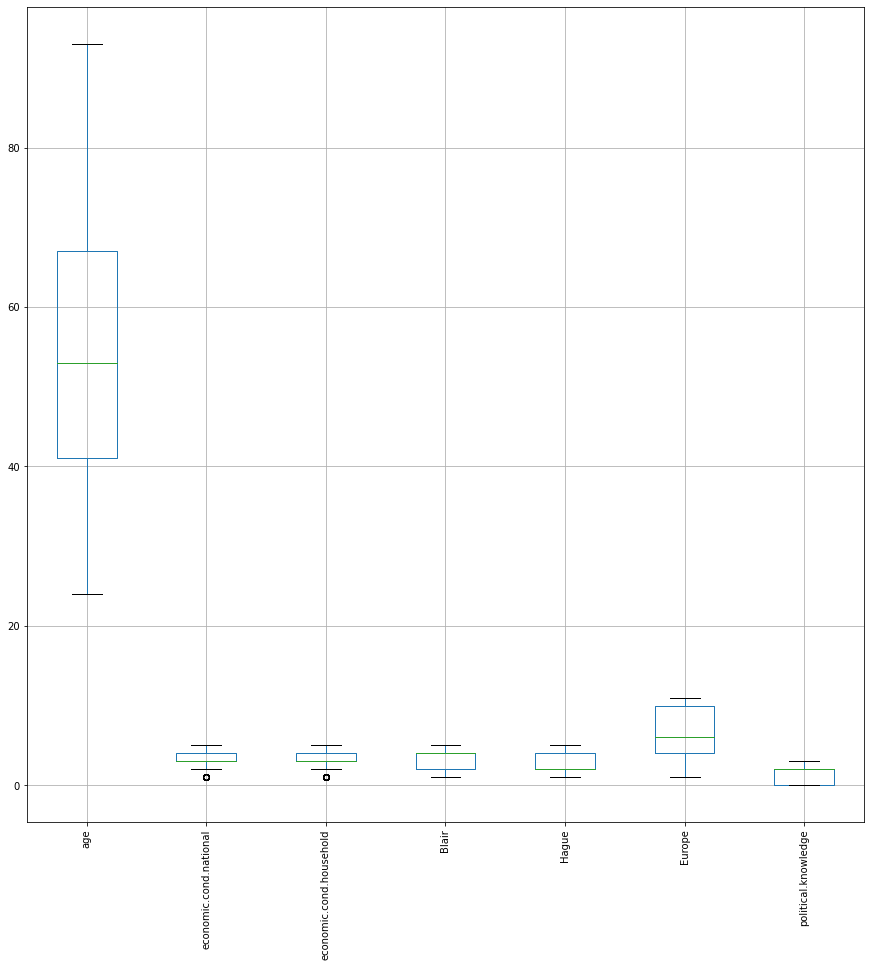

In [22]:
election_data.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

In [23]:
# Univariate Analysis

In [24]:
 def univariateAnalysis_numeric(column,nbins):
  
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(election_data[column], color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=election_data[column])
    plt.show()

In [25]:
num = election_data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(num.columns.values)

Distribution of age
----------------------------------------------------------------------------


C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


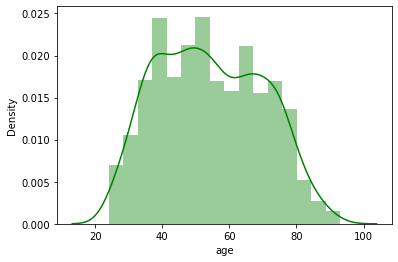

BoxPlot of age
----------------------------------------------------------------------------


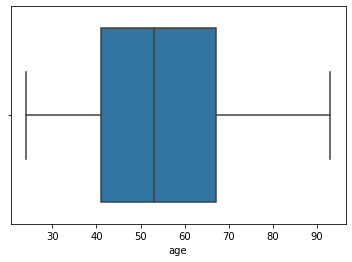

Distribution of economic.cond.national
----------------------------------------------------------------------------


C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


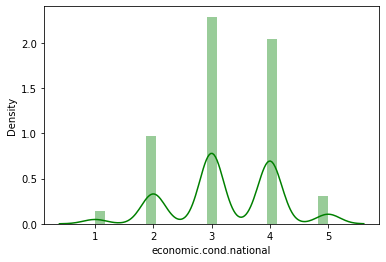

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


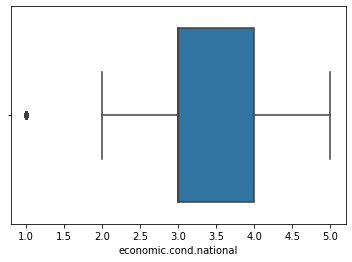

Distribution of economic.cond.household
----------------------------------------------------------------------------


C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


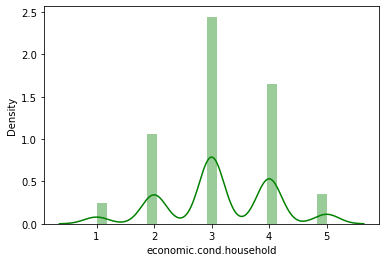

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


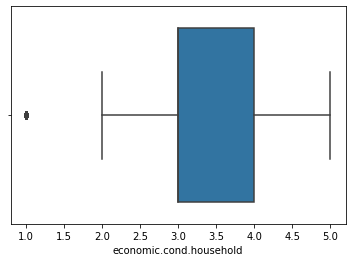

Distribution of Blair
----------------------------------------------------------------------------


C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


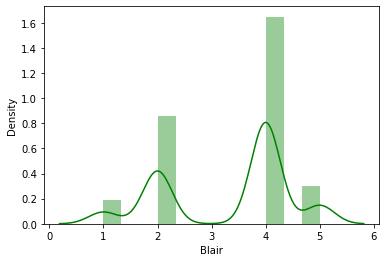

BoxPlot of Blair
----------------------------------------------------------------------------


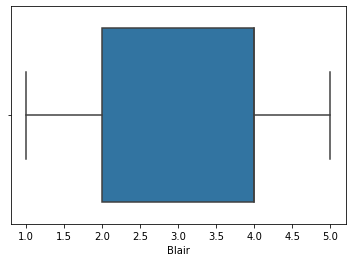

Distribution of Hague
----------------------------------------------------------------------------


C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


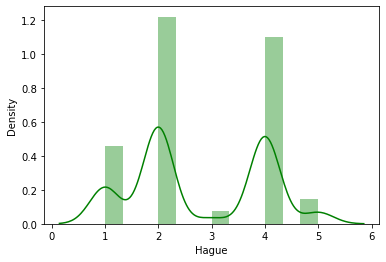

BoxPlot of Hague
----------------------------------------------------------------------------


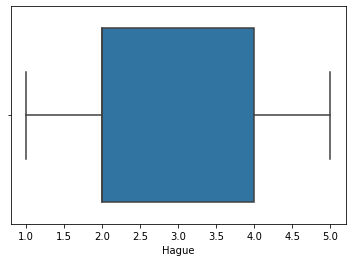

Distribution of Europe
----------------------------------------------------------------------------


C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


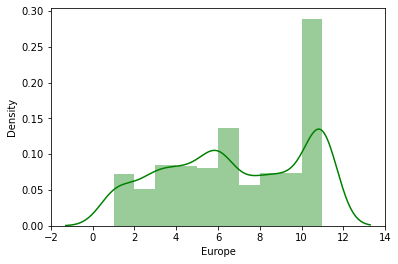

BoxPlot of Europe
----------------------------------------------------------------------------


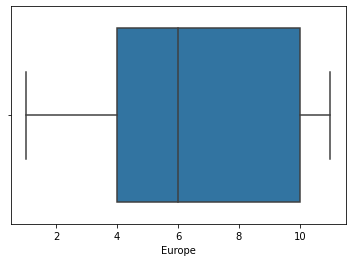

Distribution of political.knowledge
----------------------------------------------------------------------------


C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


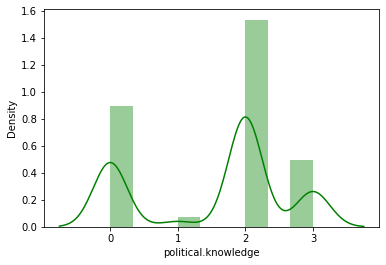

BoxPlot of political.knowledge
----------------------------------------------------------------------------


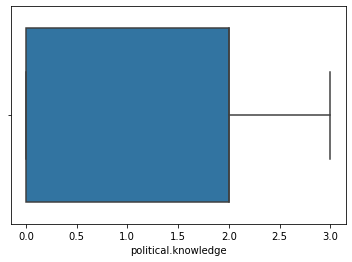

In [26]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [27]:
# Bivariate Analysis

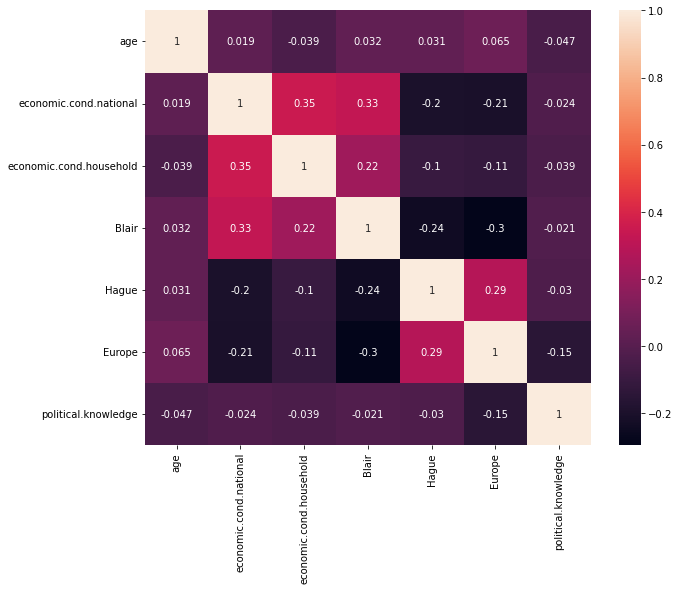

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(election_data
            .corr(),annot=True)
plt.show()

C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


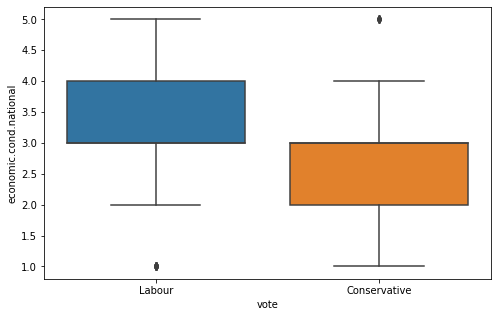

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(election_data["vote"], election_data['economic.cond.national']) 
plt.show()

C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


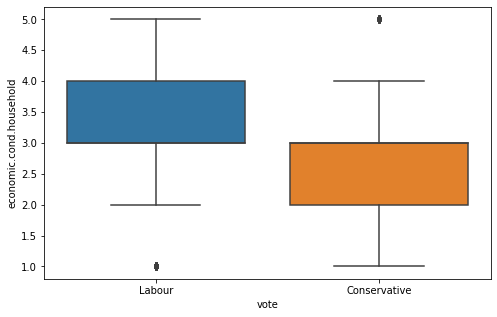

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(election_data["vote"], election_data['economic.cond.household']) 
plt.show()

C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


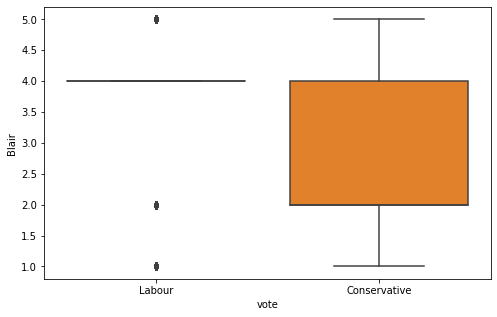

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(election_data["vote"], election_data['Blair']) 
plt.show()

C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


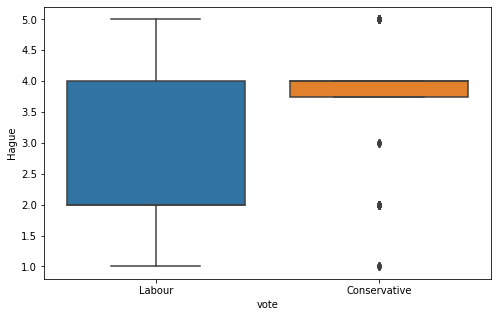

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(election_data["vote"], election_data['Hague']) 
plt.show()

C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


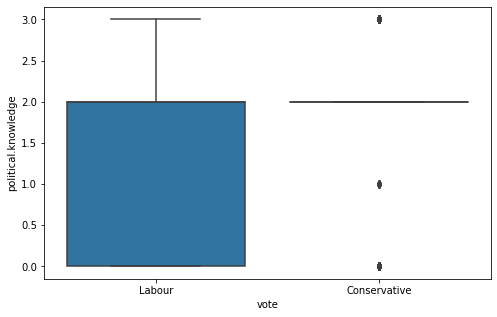

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(election_data["vote"], election_data['political.knowledge']) 
plt.show()

C:\Users\BHUSHAN-2018\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


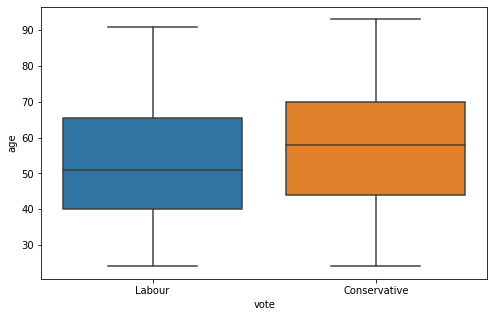

In [328]:
plt.figure(figsize=(8,5))
sns.boxplot(election_data["vote"], election_data['age']) 
plt.show()

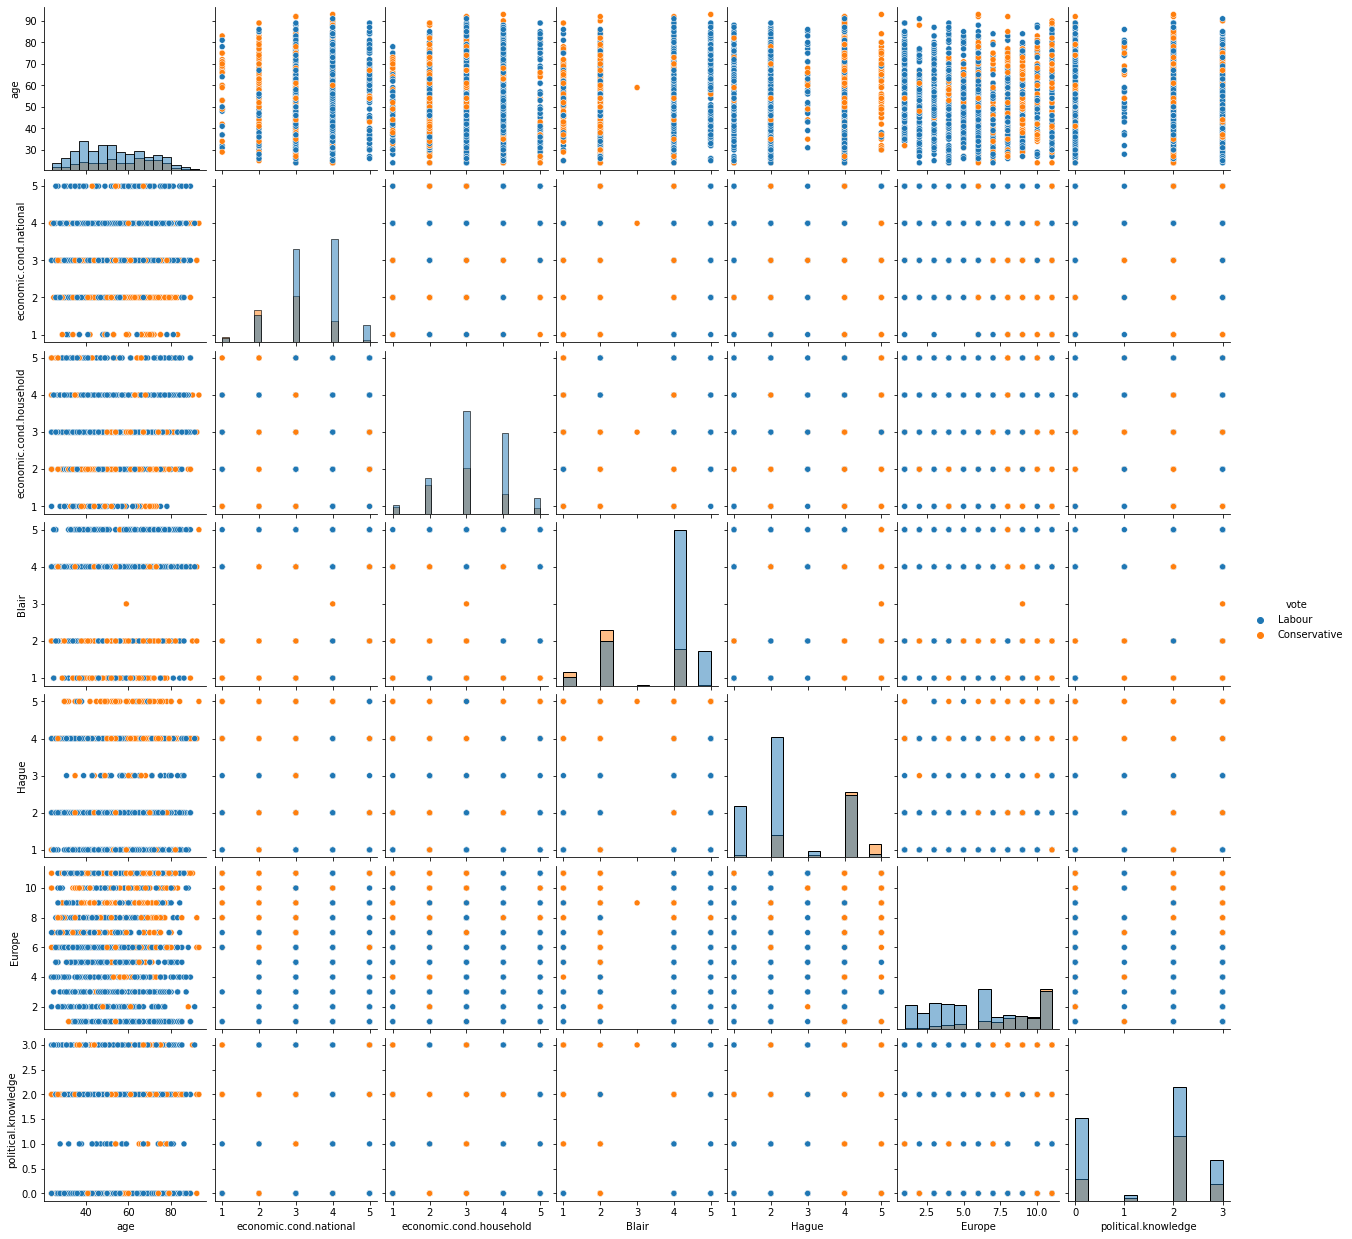

In [34]:
sns.pairplot(election_data ,diag_kind='hist' ,hue='vote');

In [35]:
# Example 1.3

In [36]:
# Data Encoding

In [37]:
for feature in election_data.columns: 
    if election_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(election_data[feature].unique()))
        print(pd.Categorical(election_data[feature].unique()).codes)
        election_data[feature] = pd.Categorical(election_data[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [331]:
cat=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]
num=['age']

In [332]:
from scipy.stats import zscore
election_data_scaled=election_data[num].apply(zscore)

In [334]:
election_data_scaled

,age
0,-0.711973
1,-1.157661
2,-1.221331
3,-1.921698
4,-0.839313
...,...
1520,0.816100
1521,1.198118
1522,-1.093992
1523,0.434081


In [335]:
for i in cat:
    election_data[i]=election_data[i].astype("object")

In [336]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [337]:
for column in election_data.columns:
    if election_data[column].dtype == 'object':
        print(column.upper(),': ',election_data[column].nunique())
        print(election_data[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [338]:
election_data =pd.get_dummies(election_data, columns=cat,drop_first=True)

In [339]:
election_data.head()

,vote,age,economic.cond.national_2,economic.cond.national_3,economic.cond.national_4,economic.cond.national_5,economic.cond.household_2,economic.cond.household_3,economic.cond.household_4,economic.cond.household_5,...,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_male
0,Labour,43,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Labour,36,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,Labour,35,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,Labour,24,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Labour,41,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [44]:
# Data Splitting

In [45]:
# Copy all the predictor variables into X dataframe
X = election_data.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = election_data['vote']

In [46]:
X.head()

,age,economic.cond.national_2,economic.cond.national_3,economic.cond.national_4,economic.cond.national_5,economic.cond.household_2,economic.cond.household_3,economic.cond.household_4,economic.cond.household_5,Blair_2,...,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_1
0,43,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,36,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,35,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,24,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int8

In [48]:
# Example 1.4

In [49]:
# Logistic Regression

In [346]:
from sklearn.model_selection import train_test_split
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.30 , random_state=1)

In [347]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [360]:
# Fit the Logistic Regression model
LR_model = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=3)
LR_model.fit(X_train_LR, y_train_LR)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=1000, n_jobs=3, penalty='none', solver='newton-cg',
                   verbose=True)

In [361]:
y_train_predict_LR = LR_model.predict(X_train_LR)
model_score_LR=LR_model.score(X_train_LR, y_train_LR)
print(model_score_LR)

0.8501413760603205


In [362]:
y_test_predict_LR = LR_model.predict(X_test_LR)
model_score_LR=LR_model.score(X_test_LR, y_test_LR)
print(model_score_LR)

0.8135964912280702


In [55]:
# Linear Discriminant Analysis

In [56]:
from sklearn.model_selection import train_test_split
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X, y, test_size=0.30 , random_state=1)

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train_LDA, y_train_LDA)

LinearDiscriminantAnalysis()

In [58]:
# For Train Data

In [59]:
y_train_predict_LDA = LDA_model.predict(X_train_LDA)
model_score_LDA = LDA_model.score(X_train_LDA, y_train_LDA)
print(model_score_LDA)

0.8444863336475024


In [60]:
# For Test Data

In [61]:
y_test_predict_LDA = LDA_model.predict(X_test_LDA)
model_score_LDA = LDA_model.score(X_test_LDA, y_test_LDA)
print(model_score_LDA)

0.8201754385964912


In [62]:
# Example 1.5

In [63]:
# KNN

In [64]:
from sklearn.model_selection import train_test_split
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X, y, test_size=0.30 , random_state=1)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier()

In [66]:
# For Train Data

In [67]:
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
model_score_KNN = KNN_model.score(X_train_KNN, y_train_KNN)
print(model_score_KNN)

0.823751178133836


In [68]:
# For Test Data

In [69]:
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
model_score_KNN = KNN_model.score(X_test_KNN, y_test_KNN)
print(model_score_KNN)

0.7368421052631579


In [70]:
0.823751178133836-0.7368421052631579

0.08690907287067817

In [71]:
# Naive Bayes

In [72]:
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X, y, test_size=0.30 , random_state=1)

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [74]:
NB_model = GaussianNB()
NB_model.fit(X_train_NB, y_train_NB)

GaussianNB()

In [75]:
# For Train Data

In [76]:
y_train_predict_NB = NB_model.predict(X_train_NB)
model_score_NB = NB_model.score(X_train_NB, y_train_NB)
print(model_score_NB)

0.7492931196983977


In [77]:
# For Test Data

In [78]:
y_test_predict_NB = NB_model.predict(X_test_NB)
model_score_NB = NB_model.score(X_test_NB, y_test_NB)
print(model_score_NB)

0.7346491228070176


In [79]:
# Example 1.6

In [80]:
# Model Tuning

In [81]:
# Bagging

In [82]:
from sklearn.model_selection import train_test_split
X_train_Bagging, X_test_Bagging, y_train_Bagging, y_test_Bagging = train_test_split(X, y, test_size=0.30 , random_state=1)

In [83]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_Bagging, y_train_Bagging)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [84]:
# For Train Data

In [85]:
y_train_predict_Bagging = Bagging_model.predict(X_train_Bagging)
model_score_Bagging =Bagging_model.score(X_train_Bagging, y_train_Bagging)
print(model_score_Bagging)

1.0


In [86]:
# For Test Data

In [87]:
 y_test_predict_Bagging = Bagging_model.predict(X_test_Bagging)
model_score_Bagging =Bagging_model.score(X_test_Bagging, y_test_Bagging)
print(model_score_Bagging)

0.8048245614035088


In [88]:
# Ada Boosting

In [89]:
from sklearn.model_selection import train_test_split
X_train_ADB, X_test_ADB, y_train_ADB, y_test_ADB = train_test_split(X, y, test_size=0.30 , random_state=1)

In [90]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train_ADB,y_train_ADB)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [91]:
# For Train Data

In [92]:
y_train_predict_ADB = ADB_model.predict(X_train_ADB)
model_score_ADB = ADB_model.score(X_train_ADB, y_train_ADB)
print(model_score_ADB)

0.8473138548539114


In [93]:
y_test_predict_ADB = ADB_model.predict(X_test_ADB)
model_score_ADB = ADB_model.score(X_test_ADB, y_test_ADB)
print(model_score_ADB)

0.8135964912280702


In [94]:
# Grid Search

In [95]:
# Logistic Regression

In [399]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [400]:
model = LogisticRegression(max_iter=10000,n_jobs=3)

In [401]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [402]:
grid_search.fit(X_train_LR, y_train_LR)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=3),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [403]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=3)


In [404]:
best_model = grid_search.best_estimator_

In [405]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train_LR)
ytest_predict = best_model.predict(X_test_LR)

In [406]:
## Getting the probabilities on the test set
 
ytest_predict_prob=best_model.predict_proba(X_test_LR)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.653306,0.346694
1,0.229773,0.770227
2,0.023002,0.976998
3,0.906837,0.093163
4,0.102246,0.897754


              precision    recall  f1-score   support

           0       0.77      0.67      0.72       307
           1       0.87      0.92      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.85      0.84      1061
 



0.8454288407163054

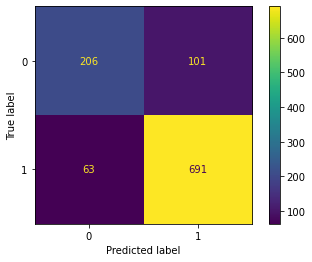

In [407]:
## Confusion matrix on the training data
model_score= best_model.score(X_train_LR, y_train_LR)
plot_confusion_matrix(best_model,X_train_LR,y_train_LR)
print(classification_report(y_train_LR, ytrain_predict),'\n');
model_score

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456
 



0.8245614035087719

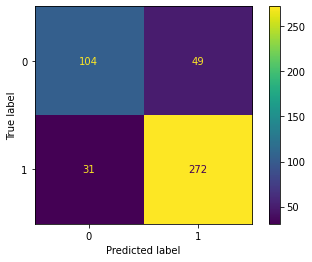

In [408]:
## Confusion matrix on the test data
model_score= best_model.score(X_test_LR, y_test_LR)
plot_confusion_matrix(best_model,X_test_LR,y_test_LR)
print(classification_report(y_test_LR, ytest_predict),'\n')
model_score

In [110]:
# Linear Discriminant Analysis

In [111]:
# KNN

In [112]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_KNN, y_train_KNN)
    # evaluate test accuracy
    scores = knn.score(X_test_KNN, y_test_KNN)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.29605263157894735,
 0.2828947368421053,
 0.26315789473684215,
 0.256578947368421,
 0.2521929824561403,
 0.256578947368421,
 0.2807017543859649,
 0.26535087719298245,
 0.2807017543859649,
 0.2894736842105263]

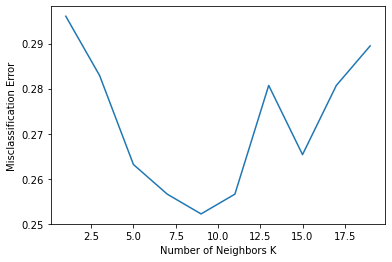

In [113]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [412]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=9)
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier(n_neighbors=9)

In [413]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
model_score_KNN = KNN_model.score(X_train_KNN, y_train_KNN)
print(model_score_KNN)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8077285579641847
[[140 167]
 [ 37 717]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58       307
           1       0.81      0.95      0.88       754

    accuracy                           0.81      1061
   macro avg       0.80      0.70      0.73      1061
weighted avg       0.81      0.81      0.79      1061



In [414]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
model_score = KNN_model.score(X_test_KNN, y_test_KNN)
print(model_score)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.7478070175438597
[[ 59  94]
 [ 21 282]]
              precision    recall  f1-score   support

           0       0.74      0.39      0.51       153
           1       0.75      0.93      0.83       303

    accuracy                           0.75       456
   macro avg       0.74      0.66      0.67       456
weighted avg       0.75      0.75      0.72       456



In [427]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier(n_neighbors=7)

In [428]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
model_score_KNN = KNN_model.score(X_train_KNN, y_train_KNN)
print(model_score_KNN)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8171536286522149
[[152 155]
 [ 39 715]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.61       307
           1       0.82      0.95      0.88       754

    accuracy                           0.82      1061
   macro avg       0.81      0.72      0.75      1061
weighted avg       0.81      0.82      0.80      1061



In [429]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
model_score = KNN_model.score(X_test_KNN, y_test_KNN)
print(model_score)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.743421052631579
[[ 62  91]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.70      0.41      0.51       153
           1       0.75      0.91      0.83       303

    accuracy                           0.74       456
   macro avg       0.73      0.66      0.67       456
weighted avg       0.74      0.74      0.72       456



In [120]:
# Example 1.7

In [121]:
# Performance Metrices

In [122]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [123]:
# Logistic Regression

In [124]:
print('Train Data')
print(metrics.confusion_matrix(y_train_LR, y_train_predict_LR))
print(metrics.classification_report(y_train_LR, y_train_predict_LR))

print('Test Data')
print(metrics.confusion_matrix(y_test_LR, y_test_predict_LR))
print(metrics.classification_report(y_test_LR, y_test_predict_LR))

Train Data
[[215  92]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.85      0.85      0.85      1061

Test Data
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [650]:
LR_metrics=classification_report(y_train_LR, y_train_predict_LR,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_precision=round(df.loc["1"][0],2)
LR_train_recall=round(df.loc["1"][1],2)
LR_train_f1=round(df.loc["1"][2],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

LR_train_precision  0.88
LR_train_recall  0.91
LR_train_f1  0.9


In [649]:
LR_metrics=classification_report(y_test_LR, y_test_predict_LR,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_test_precision=round(df.loc["1"][0],2)
LR_test_recall=round(df.loc["1"][1],2)
LR_test_f1=round(df.loc["1"][2],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

LR_test_precision  0.84
LR_test_recall  0.88
LR_test_f1  0.86


AUC: 0.906


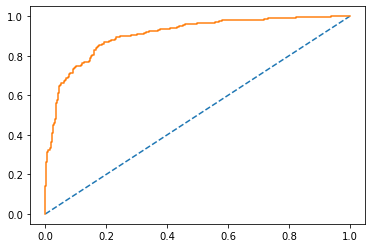

In [125]:
# predict probabilities
probs = LR_model.predict_proba(X_train_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_LR = roc_auc_score(y_train_LR, probs)
print('AUC: %.3f' % train_auc_LR)
# calculate roc curve
train_fpr_LR, train_tpr_LR, train_thresholds = roc_curve(y_train_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LR, train_tpr_LR);

AUC: 0.876


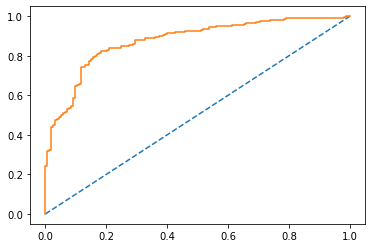

In [126]:
# predict probabilities
probs = LR_model.predict_proba(X_test_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_LR = roc_auc_score(y_test_LR, probs)
print('AUC: %.3f' % test_auc_LR)
# calculate roc curve
test_fpr_LR, test_tpr_LR, test_thresholds = roc_curve(y_test_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_LR, test_tpr_LR);

In [127]:
# Linear Discriminant Analysis

In [128]:
print('Train Data')
print(metrics.confusion_matrix(y_train_LDA, y_train_predict_LDA))
print(metrics.classification_report(y_train_LDA, y_train_predict_LDA))

print('Test Data')
print(metrics.confusion_matrix(y_test_LR, y_test_predict_LR))
print(metrics.classification_report(y_test_LR, y_test_predict_LR))

Train Data
[[216  91]
 [ 74 680]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

Test Data
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [647]:
LDA_metrics=classification_report(y_train_LDA, y_train_predict_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][0],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_f1=round(df.loc["1"][2],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.88
LDA_train_recall  0.9
LDA_train_f1  0.89


In [648]:
LDA_metrics=classification_report(y_test_LDA, y_test_predict_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.85
LDA_test_recall  0.88
LDA_test_f1  0.87


AUC: 0.902


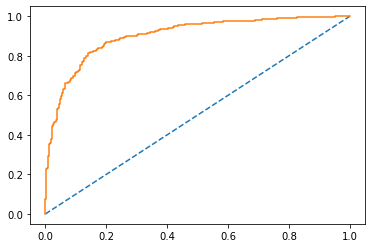

In [129]:
# predict probabilities
probs = LDA_model.predict_proba(X_train_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_LDA = roc_auc_score(y_train_LDA, probs)
print('AUC: %.3f' % train_auc_LDA)
# calculate roc curve
train_fpr_LDA, train_tpr_LDA, train_thresholds = roc_curve(y_train_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LDA, train_tpr_LDA);

AUC: 0.877


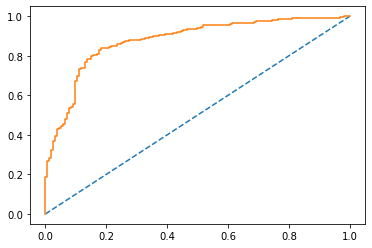

In [130]:
# predict probabilities
probs = LDA_model.predict_proba(X_test_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_LDA = roc_auc_score(y_test_LDA, probs)
print('AUC: %.3f' % test_auc_LDA)
# calculate roc curve
test_fpr_LDA, test_tpr_LDA, test_thresholds = roc_curve(y_test_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_LDA, test_tpr_LDA);

In [131]:
# KNN

In [132]:
 print('Train Data')
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

print('Test Data')
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

Train Data
[[152 155]
 [ 39 715]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.61       307
           1       0.82      0.95      0.88       754

    accuracy                           0.82      1061
   macro avg       0.81      0.72      0.75      1061
weighted avg       0.81      0.82      0.80      1061

Test Data
[[ 62  91]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.70      0.41      0.51       153
           1       0.75      0.91      0.83       303

    accuracy                           0.74       456
   macro avg       0.73      0.66      0.67       456
weighted avg       0.74      0.74      0.72       456



In [646]:
KNN_metrics=classification_report(y_train_KNN, y_train_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df.loc["1"][0],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_f1=round(df.loc["1"][2],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.82
KNN_train_recall  0.95
KNN_train_f1  0.88


In [645]:
KNN_metrics=classification_report(y_test_KNN, y_test_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1"][0],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_f1=round(df.loc["1"][2],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.75
KNN_test_recall  0.91
KNN_test_f1  0.83


AUC: 0.884


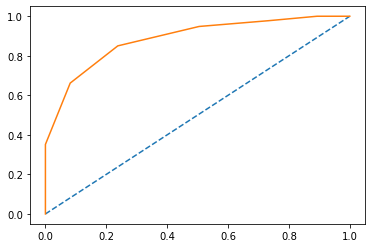

In [133]:
# predict probabilities
probs = KNN_model.predict_proba(X_train_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_KNN = roc_auc_score(y_train_KNN, probs)
print('AUC: %.3f' % train_auc_KNN)
# calculate roc curve
train_fpr_KNN, train_tpr_KNN, train_thresholds = roc_curve(y_train_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_KNN, train_tpr_KNN);

AUC: 0.762


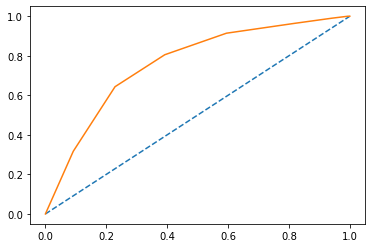

In [134]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_KNN = roc_auc_score(y_test_KNN, probs)
print('AUC: %.3f' % test_auc_KNN)
# calculate roc curve
test_fpr_KNN, test_tpr_KNN, test_thresholds = roc_curve(y_test_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_KNN, test_tpr_KNN);

In [135]:
# Naive Byaes

In [136]:
print('Train Data')
print(metrics.confusion_matrix(y_train_NB, y_train_predict_NB))
print(metrics.classification_report(y_train_NB, y_train_predict_NB))

print('Test Data')
print(metrics.confusion_matrix(y_test_NB, y_test_predict_NB))
print(metrics.classification_report(y_test_NB, y_test_predict_NB))

Train Data
[[248  59]
 [207 547]]
              precision    recall  f1-score   support

           0       0.55      0.81      0.65       307
           1       0.90      0.73      0.80       754

    accuracy                           0.75      1061
   macro avg       0.72      0.77      0.73      1061
weighted avg       0.80      0.75      0.76      1061

Test Data
[[120  33]
 [ 88 215]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       153
           1       0.87      0.71      0.78       303

    accuracy                           0.73       456
   macro avg       0.72      0.75      0.72       456
weighted avg       0.77      0.73      0.74       456



In [643]:
NB_metrics=classification_report(y_train_NB, y_train_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][0],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][2],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.9
NB_train_recall  0.73
NB_train_f1  0.8


In [644]:
NB_metrics=classification_report(y_test_NB, y_test_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.87
NB_test_recall  0.71
NB_test_f1  0.78


AUC: 0.843


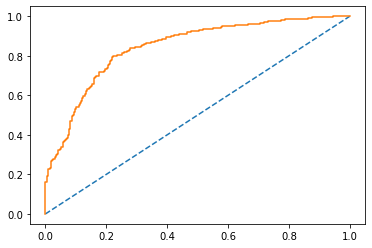

In [137]:
# predict probabilities
probs = NB_model.predict_proba(X_train_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_NB = roc_auc_score(y_train_NB, probs)
print('AUC: %.3f' % train_auc_NB)
# calculate roc curve
train_fpr_NB, train_tpr_NB, train_thresholds = roc_curve(y_train_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_NB, train_tpr_NB);

AUC: 0.819


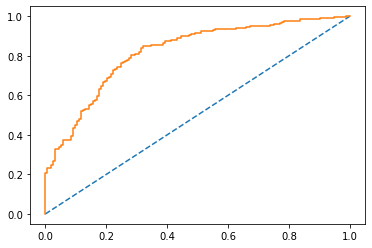

In [138]:
# predict probabilities
probs = NB_model.predict_proba(X_test_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_NB = roc_auc_score(y_test_NB, probs)
print('AUC: %.3f' % test_auc_NB)
# calculate roc curve
test_fpr_NB, test_tpr_NB, test_thresholds = roc_curve(y_test_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_NB, test_tpr_NB);

In [139]:
# Bagging

In [140]:
print('Train Data')
print(metrics.confusion_matrix(y_train_Bagging, y_train_predict_Bagging))
print(metrics.classification_report(y_train_Bagging, y_train_predict_Bagging))

print('Test Data')
print(metrics.confusion_matrix(y_test_Bagging, y_test_predict_Bagging))
print(metrics.classification_report(y_test_Bagging, y_test_predict_Bagging))

Train Data
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

Test Data
[[103  50]
 [ 39 264]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       153
           1       0.84      0.87      0.86       303

    accuracy                           0.80       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.80      0.80      0.80       456



In [639]:
Bagging_metrics=classification_report(y_train_Bagging, y_train_predict_Bagging,output_dict=True)
df=pd.DataFrame(Bagging_metrics).transpose()
Bagging_train_precision=round(df.loc["1"][0],2)
Bagging_train_recall=round(df.loc["1"][1],2)
Bagging_train_f1=round(df.loc["1"][2],2)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_precision  1.0
Bagging_train_recall  1.0
Bagging_train_f1  1.0


In [641]:
Bagging_metrics=classification_report(y_test_Bagging, y_test_predict_Bagging,output_dict=True)
df=pd.DataFrame(Bagging_metrics).transpose()
Bagging_test_precision=round(df.loc["1"][0],2)
Bagging_test_recall=round(df.loc["1"][1],2)
Bagging_test_f1=round(df.loc["1"][2],2)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_precision  0.84
Bagging_test_recall  0.87
Bagging_test_f1  0.86


AUC: 1.000


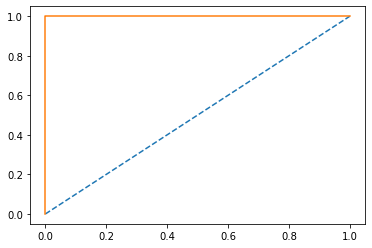

In [141]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train_Bagging)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_Bagging = roc_auc_score(y_train_Bagging, probs)
print('AUC: %.3f' % train_auc_Bagging)
# calculate roc curve
train_fpr_Bagging, train_tpr_Bagging, train_thresholds = roc_curve(y_train_Bagging, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_Bagging, train_tpr_Bagging);

AUC: 0.866


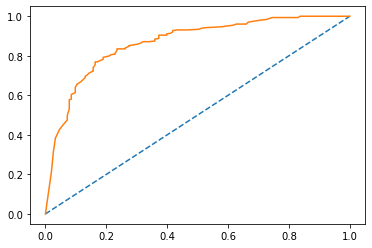

In [142]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test_Bagging)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_Bagging = roc_auc_score(y_test_Bagging, probs)
print('AUC: %.3f' % test_auc_Bagging)
# calculate roc curve
test_fpr_Bagging, test_tpr_Bagging, test_thresholds = roc_curve(y_test_Bagging, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_Bagging, test_tpr_Bagging);

In [143]:
# Ada Boosting

In [144]:
print('Train Data')
print(metrics.confusion_matrix(y_train_ADB, y_train_predict_ADB))
print(metrics.classification_report(y_train_ADB, y_train_predict_ADB))

print('Test Data')
print(metrics.confusion_matrix(y_test_ADB, y_test_predict_ADB))
print(metrics.classification_report(y_test_ADB, y_test_predict_ADB))

Train Data
[[211  96]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061

Test Data
[[100  53]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       153
           1       0.84      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



In [637]:
ADB_metrics=classification_report(y_train_ADB, y_train_predict_ADB,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_train_precision=round(df.loc["1"][0],2)
ADB_train_recall=round(df.loc["1"][1],2)
ADB_train_f1=round(df.loc["1"][2],2)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_train_precision  0.88
ADB_train_recall  0.91
ADB_train_f1  0.89


In [636]:
ADB_metrics=classification_report(y_test_ADB, y_test_predict_ADB,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_test_precision=round(df.loc["1"][0],2)
ADB_test_recall=round(df.loc["1"][1],2)
ADB_test_f1=round(df.loc["1"][2],2)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_test_precision  0.84
ADB_test_recall  0.89
ADB_test_f1  0.86


AUC: 0.912


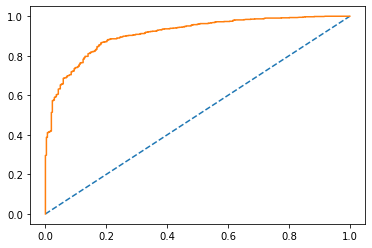

In [145]:
# predict probabilities
probs = ADB_model.predict_proba(X_train_ADB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_ADB = roc_auc_score(y_train_ADB, probs)
print('AUC: %.3f' % train_auc_ADB)
# calculate roc curve
train_fpr_ADB, train_tpr_ADB, train_thresholds = roc_curve(y_train_ADB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_ADB, train_tpr_ADB);

AUC: 0.878


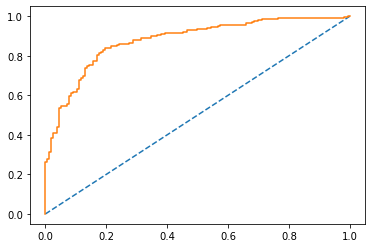

In [146]:
# predict probabilities
probs = ADB_model.predict_proba(X_test_ADB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_ADB = roc_auc_score(y_test_ADB, probs)
print('AUC: %.3f' % test_auc_ADB)
# calculate roc curve
test_fpr_ADB, test_tpr_ADB, test_thresholds = roc_curve(y_test_ADB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_ADB, test_tpr_ADB);

In [658]:
index=['AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[train_auc_LR,LR_train_recall,LR_train_precision,LR_train_f1],
        'Logistic Regression Test':[test_auc_LR,LR_test_recall,LR_test_precision,LR_test_f1],
       'LDA Train':[train_auc_LDA,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA  Test':[test_auc_LDA,LDA_test_recall,LDA_test_precision,LDA_test_f1],
       'KNN Train':[train_auc_KNN,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[test_auc_KNN,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'NB Train':[train_auc_NB,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[test_auc_NB,NB_test_recall,NB_test_precision,NB_test_f1],
        'Bagging Train':[train_auc_Bagging,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
        'Bagging Test':[test_auc_Bagging,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
        'ADB Train':[train_auc_ADB,ADB_train_recall,ADB_train_precision,ADB_train_f1],
        'ADB Test':[test_auc_ADB,ADB_test_recall,ADB_test_precision,ADB_test_f1]},
                    index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,Bagging Train,Bagging Test,ADB Train,ADB Test
AUC,0.91,0.88,0.90,0.88,0.88,0.76,0.84,0.82,1.0,0.87,0.91,0.88
Recall,0.91,0.88,0.90,0.88,0.95,0.91,0.73,0.71,1.0,0.87,0.91,0.89
Precision,0.88,0.84,0.88,0.85,0.82,0.75,0.90,0.87,1.0,0.84,0.88,0.84
F1 Score,0.90,0.86,0.89,0.87,0.88,0.83,0.80,0.78,1.0,0.86,0.89,0.86


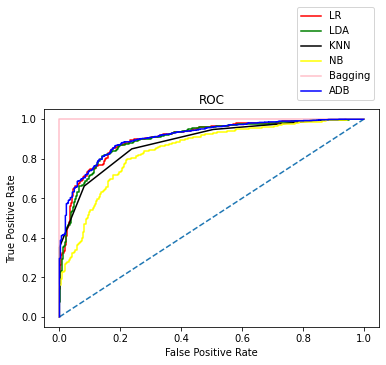

In [660]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_LR, train_tpr_LR,color='red',label="LR")
plt.plot(train_fpr_LDA,train_tpr_LDA,color='green',label="LDA")
plt.plot(train_fpr_KNN,train_tpr_KNN,color='black',label="KNN")
plt.plot(train_fpr_NB,train_tpr_NB,color='yellow',label="NB")
plt.plot(train_fpr_Bagging,train_tpr_Bagging,color='pink',label="Bagging")
plt.plot(train_fpr_ADB,train_tpr_ADB,color='blue',label="ADB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

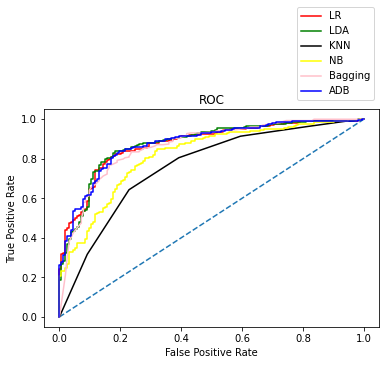

In [661]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_LR, test_tpr_LR,color='red',label="LR")
plt.plot(test_fpr_LDA,test_tpr_LDA,color='green',label="LDA")
plt.plot(test_fpr_KNN,test_tpr_KNN,color='black',label="KNN")
plt.plot(test_fpr_NB,test_tpr_NB,color='yellow',label="NB")
plt.plot(test_fpr_Bagging,test_tpr_Bagging,color='pink',label="Bagging")
plt.plot(test_fpr_ADB,test_tpr_ADB,color='blue',label="ADB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [147]:
# Example 2

In [471]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Error loading inaugural: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [472]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHUSHAN-2018\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BHUSHAN-2018\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [499]:
speech1=inaugural.raw('1941-Roosevelt.txt')
word_count=len(inaugural.words('1941-Roosevelt.txt')) 
sent_count=len(inaugural.sents('1941-Roosevelt.txt')) 
word_count,sent_count,speech1

(1536,
 68,
 'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believ

In [500]:
speech2=inaugural.raw('1961-Kennedy.txt')
word_count=len(inaugural.words('1961-Kennedy.txt')) 
sent_count=len(inaugural.sents('1961-Kennedy.txt')) 
word_count,sent_count,speech2

(1546,
 52,
 'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed t

In [501]:
speech3=inaugural.raw('1973-Nixon.txt')
word_count=len(inaugural.words('1973-Nixon.txt')) 
sent_count=len(inaugural.sents('1973-Nixon.txt')) 
word_count,sent_count,speech3

(2028,
 69,
 'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize ou

In [502]:
speech=[speech1,speech2,speech3]
speech

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democ

In [503]:
index=['speech1','speech2','speech3']

In [504]:
df=pd.DataFrame({'speeches':speech,'indices':index})
df

,speeches,indices
0,On each national day of inauguration since 178...,speech1
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",speech2
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",speech3


In [505]:
df['char_count'] = df['speeches'].str.len() ## this also includes spaces
df[['speeches','char_count']].head()

,speeches,char_count
0,On each national day of inauguration since 178...,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [570]:
# Data Preprocessing

In [614]:
words_speech1=inaugural.words('1941-Roosevelt.txt')
words_speech1

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [616]:
import string
freq=['let','us','nation','--','united states','nation','america','new','shall','know']
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) +freq
 
# Converting all the words to lower casse
words_speech1 = (x.lower() for x in words_speech1) 

# Only keeping the words which are not the 'stopwords'
words_speech1_clean = [word for word in words_speech1 if word not in stopwords]
 
# Creating a frequency distribution of the lower case words which does not contain any stopwords
words_speech1_freq = nltk.FreqDist(words_speech1_clean)

# Extracting the  most common 10 words after the list of words have been converted to lowercase and the stopwords 
word_features_speech1 = [item[0] for item in words_speech1_freq.most_common(10)]

In [617]:
word_features_speech1

['spirit',
 'life',
 'democracy',
 'people',
 'years',
 'freedom',
 'human',
 'men',
 'body',
 'mind']

In [629]:
words_speech2=inaugural.words('1961-Kennedy.txt')
words_speech2

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [630]:
import string
freq=['let','us','nation','--','united states','nation','america','new','shall','sides']
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) +freq
 
# Converting all the words to lower casse
words_speech2 = (x.lower() for x in words_speech2) 

# Only keeping the words which are not the 'stopwords'
words_speech2_clean = [word for word in words_speech2 if word not in stopwords] 


# Creating a frequency distribution of the lower case words which does not contain any stopwords
words_speech2_freq = nltk.FreqDist(words_speech2_clean)

# Extracting the  most common 10 words after the list of words have been converted to lowercase and the stopwords 
word_features_speech2 = [item[0] for item in words_speech2_freq.most_common(10)]

In [631]:
word_features_speech2 

['world',
 'pledge',
 'citizens',
 'power',
 'free',
 'nations',
 'ask',
 'president',
 'fellow',
 'freedom']

In [624]:
words_speech3=inaugural.words(('1973-Nixon.txt'))

In [625]:
import string
freq=['let','us','nation','--','united states','nation','america','new']
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) +freq
 
# Converting all the words to lower casse
words_speech3 = (x.lower() for x in words_speech3) 

# Only keeping the words which are not the 'stopwords'
words_speech3_clean = [word for word in words_speech3 if word not in stopwords ]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
words_speech3_freq = nltk.FreqDist(words_speech3_clean)

# Extracting the  most common 10 words after the list of words have been converted to lowercase and the stopwords 
word_features_speech3 = [item[0] for item in words_speech3_freq.most_common(10)]

In [626]:
word_features_speech3

['peace',
 'world',
 'responsibility',
 'government',
 'great',
 'home',
 'abroad',
 'together',
 'years',
 'shall']

In [607]:
!pip install wordcloud

In [620]:
wc_speech1 = ' '.join(words_speech1_clean) 

Word Cloud for  speech1 (after cleaning)!!


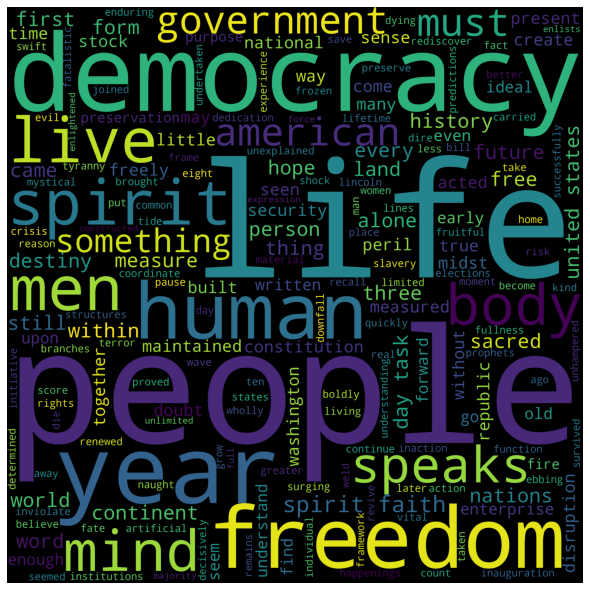

In [621]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_speech1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for  speech1 (after cleaning)!!")
plt.show()

In [632]:
wc_speech2 = ' '.join(words_speech2_clean) 

Word Cloud for  speech2 (after cleaning)!!


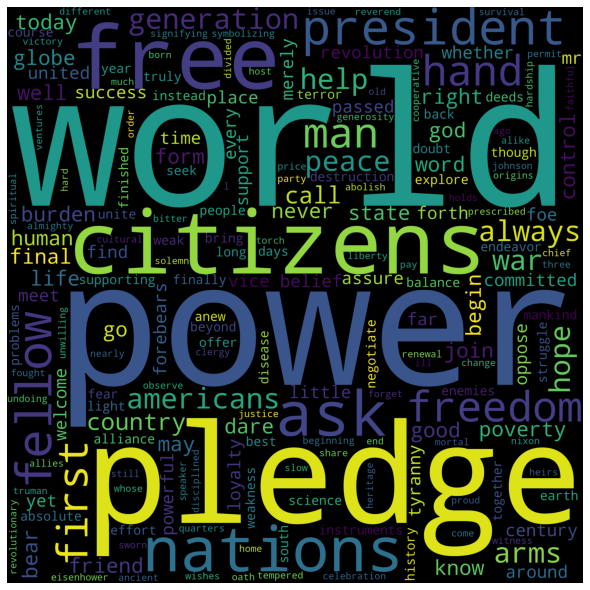

In [633]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_speech2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for  speech2 (after cleaning)!!")
plt.show()

In [634]:
wc_speech3 = ' '.join(words_speech3_clean) 

Word Cloud for  speech3 (after cleaning)!!


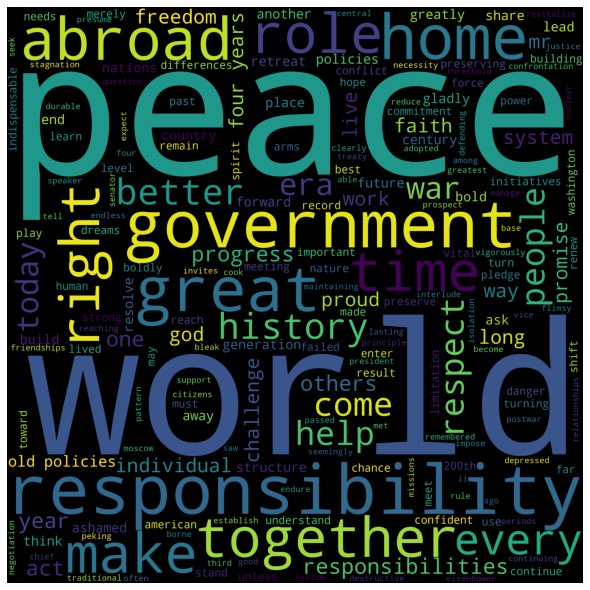

In [635]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_speech3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for  speech3 (after cleaning)!!")
plt.show()